In [2]:
pip install scikit-learn==0.22

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import pickle
from scipy.stats import pearsonr
import scipy as sp
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from random import sample
import random
import csv
import scipy
from sklearn import preprocessing
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from shapely.geometry import Polygon
from shapely.geometry import box
import matplotlib.patches as patches
import random
from shapely.geometry import Point
from copy import copy
from shapely.ops import unary_union
from spherecluster import SphericalKMeans
from spherecluster import VonMisesFisherMixture
from spherecluster import sample_vMF

ModuleNotFoundError: No module named 'sklearn.cluster.KMeans'

In [3]:
#create df for each cluster
df = []
used_cluster = [0, 1, 2, 3, 4, 5, 6, 7]
for cluster in used_cluster:
    df.append(pd.read_csv("cluster" + str(cluster) + ".csv"))

In [4]:
for dataframe in range(len(df)):#
    del df[dataframe]["store_and_fwd_flag"]

In [5]:
newdf = pd.concat(df)

In [6]:
newdf.shape

(872712, 24)

In [7]:
new = newdf[['pickup_hour', 'pickup_weekday', 'speed']].copy()
new

,pickup_hour,pickup_weekday,speed
0,17,0,17.473990
1,19,2,13.699215
2,22,5,14.717902
3,23,4,29.913317
4,21,3,17.483443
...,...,...,...
210155,22,5,13.597378
210156,18,1,12.175659
210157,19,5,27.485281
210158,14,2,16.862383


In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872712 entries, 0 to 210159
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pickup_hour     872712 non-null  int64  
 1   pickup_weekday  872712 non-null  int64  
 2   speed           872712 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 26.6 MB


In [9]:
new['pickup_weekday'] += 1
new

,pickup_hour,pickup_weekday,speed
0,17,1,17.473990
1,19,3,13.699215
2,22,6,14.717902
3,23,5,29.913317
4,21,4,17.483443
...,...,...,...
210155,22,6,13.597378
210156,18,2,12.175659
210157,19,6,27.485281
210158,14,3,16.862383


In [10]:
new['pickup_hour'] = new['pickup_hour'].replace(0, 24)

In [11]:
newar = new.to_numpy()
newar

array([[17.        ,  1.        , 17.4739901 ],
       [19.        ,  3.        , 13.69921496],
       [22.        ,  6.        , 14.71790244],
       ...,
       [19.        ,  6.        , 27.48528089],
       [14.        ,  3.        , 16.86238251],
       [16.        ,  2.        , 28.50538397]])

In [12]:
skm = SphericalKMeans(n_clusters=5)

In [13]:
skm.fit(newar)

SphericalKMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5,
                n_init=10, n_jobs=1, normalize=True, random_state=None,
                tol=0.0001, verbose=0)

In [14]:
news = new.assign(cluster=skm.labels_)

In [18]:
data0 = news[news.cluster==0]
data1 = news[news.cluster==1]
data2 = news[news.cluster==2]
data3 = news[news.cluster==3]
data4 = news[news.cluster==4]
alld = [data0, data1, data2]

NameError: name 'k_means_optimum' is not defined

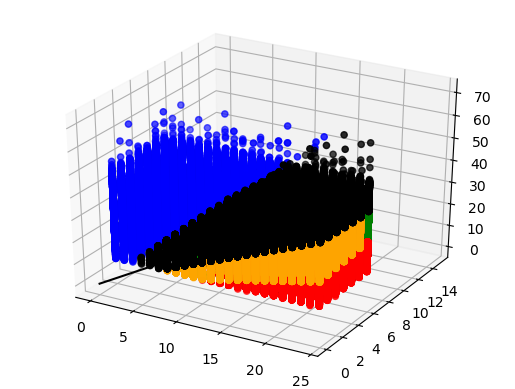

In [16]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black') 
# Data for three-dimensional scattered points
kplot.scatter3D(data1.pickup_hour, data1.pickup_weekday, data1.speed, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.pickup_hour, data2.pickup_weekday, data2.speed,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.pickup_hour, data3.pickup_weekday, data3.speed, c='orange', label = 'Cluster 3')
kplot.scatter3D(data4.pickup_hour, data4.pickup_weekday, data4.speed, c='blue', label = 'Cluster 4')
kplot.scatter3D(data5.pickup_hour, data5.pickup_weekday, data5.speed, c='black', label = 'Cluster 5')
plt.legend()
plt.title("Kmeans")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.show()

In [21]:
news

,pickup_hour,pickup_weekday,speed,cluster
0,17,1,17.473990,2
1,19,3,13.699215,0
2,22,6,14.717902,0
3,23,5,29.913317,2
4,21,4,17.483443,0
...,...,...,...,...
210155,22,6,13.597378,0
210156,18,2,12.175659,0
210157,19,6,27.485281,1
210158,14,3,16.862383,2


In [22]:
news.to_csv('spherical.csv')